In [1]:
import tensorflow as tf
import numpy
tf.__version__

'2.3.0'

In [3]:
#step1. 데이터 로드& 변수에 할당.
#data load 주피터노트북 버전
data = numpy.loadtxt("C:/Users/GimBoSeong/Documents/DataScience/ICT/Py_Project/20201119_day24/Blood_fat.csv",delimiter=",")
#print(data) #[몸무게, 나이, 혈중지방량]

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

a1     = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64, seed=0 ))#기울기 
a2     = tf.Variable(tf.random.uniform([1], 0, 10, dtype=tf.float64, seed=0 ))#기울기 
b      = tf.Variable(tf.random.uniform([1], 0, 100,dtype=tf.float64, seed=0 ))#절편


#기울기 a1,a2 / y절편b의 값을 정한다.(이걸먼저 않으면 미정의 에러남...)
#a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
#a2 = tf.Variable(tf.random_uniform([1], 0 ,10, dtype=tf.float64, seed=0))
#b = tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64, seed=0))

#print(x1)
#print(x2)
#print(y_data)

In [17]:
#기울기와 절편을 통하여 계산되는 예상 y값

def hypothesis(a1,a2,b):
    return x1 * a1 + x2 * a2 +b    #가설(다중회귀분석) a1x1 + a2x2 +b

def cost(a1,a2,b):
    #손실을 계산하는 함수.
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a1,a2,b) - y_data )))

def costFunc():
    return tf.sqrt(tf.reduce_mean(tf.square(hypothesis(a1,a2,b) - y_data ))) #minimize에서 사용 손실(비용)함수

#경사하강법 실시.
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
#텐서플로 버전1의 gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)가 
#텐서플로 버전2로 오면서 사용이 불가하게 되었다.
#대신 tf.keras.optimizers.SGD에서 대신 할 수 있도록 대체되었다.(#기존 버전1과 딴사람처럼 달라졌다고 하는 대표적이유)

for i in range(5000):
    opt.minimize(costFunc, var_list=[a1,a2,b])
    #opt.minimize()도 함수의 형태로 값을 받는 것으로 바뀌었기에 기존 버전1의 방식대로 할수가 없다
    #버전2는 프로그래머들의 요청인 함수개념등 프로그래머들의 제안들이 도입되고,
    #텐서플로 버전1의 그래프와 세션 개념을 숨기면서 방식이 바뀌어져 버렸다.
    
    if i % 500 == 0 :
        print(i, f'{cost(a1,a2,b)},{a1.numpy()}, {a2.numpy()}, {b.numpy()}' )
                 # cost(RMSE)값,     기울기1,     기울기2,      y절편값
    da1=a1.numpy()
    da2=a2.numpy()
    db=b.numpy()
    
#아래는 예측값.
for i in range(25):
    print("(da1*x1[i]) + da2*x2[i]+db :",(da1*x1[i]) + da2*x2[i]+db )

0 315.2745757624529,[4.33743248], [7.38157238], [30.67104836]
1000 42.13870865401993,[0.95620025], [5.44617655], [30.65391609]
2000 42.13769819513337,[0.95583837], [5.44602236], [30.68570138]
3000 42.136689044663164,[0.95547673], [5.44586828], [30.71746608]
4000 42.13568120100892,[0.95511532], [5.44571429], [30.74921021]
(da1*x1[i]) + da2*x2[i]+db : [361.47606613]
(da1*x1[i]) + da2*x2[i]+db : [209.3891921]
(da1*x1[i]) + da2*x2[i]+db : [376.00909387]
(da1*x1[i]) + da2*x2[i]+db : [260.98053415]
(da1*x1[i]) + da2*x2[i]+db : [413.73919621]
(da1*x1[i]) + da2*x2[i]+db : [232.79797686]
(da1*x1[i]) + da2*x2[i]+db : [243.4061315]
(da1*x1[i]) + da2*x2[i]+db : [295.5634065]
(da1*x1[i]) + da2*x2[i]+db : [416.60345973]
(da1*x1[i]) + da2*x2[i]+db : [341.99215447]
(da1*x1[i]) + da2*x2[i]+db : [187.25272707]
(da1*x1[i]) + da2*x2[i]+db : [284.56643031]
(da1*x1[i]) + da2*x2[i]+db : [376.00909387]
(da1*x1[i]) + da2*x2[i]+db : [210.44980168]
(da1*x1[i]) + da2*x2[i]+db : [413.84505129]
(da1*x1[i]) + da2*x2

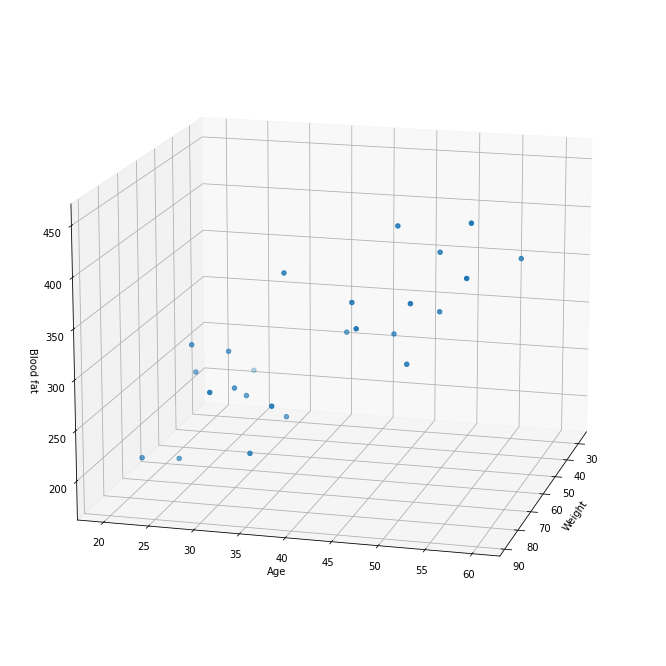

In [16]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [ ]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) 
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(elev=0, azim=0) #보는 각도를 정면으로 설정.
plt.show()

In [ ]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           

#산점도 플롯을 만듦    
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [ ]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [ ]:
#3차원 그래프 그리기
import matplotlib.pyplot as plt #혹시 없는경우 !pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12,12)) #figure(그래프가 그려지는 객체) 생성
ax  = fig.add_subplot(111,projection='3d') #전체공간을 1*1로 잡은 중 첫번째(111), 3d로 표시, 전체공간을 나누는 개념.
                                           #projection='3d' : 표고와 방위각을 지정하여 3d그래프가 보이는 방향을 설정한다.           
#산점도 플롯을 만듦
ax.scatter(x1,x2,y_data) #실제데이터의 그래프를 생성.
ax.scatter(x1,x2,calc_y) #이번에는 예측된 값(calc_y)을 찍는다.
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(0,0)
plt.show()

In [ ]:
#step3.학습률 값 설정
learning_rate = 0.001

In [ ]:
#step4.텐서플로우 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

#RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [ ]:
#step5.학습 진행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer() )

    for step in range(2001):
        sess.run(gradient_decent)
        if step % 100 == 0 :
            print("Epoch: %.f, RMSE = %.04f, 기울기a1=%.04f, 기울기 a2=%.04f, y절편b=%.04f"
                 %(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b) ))
            da1=sess.run(a1)
            da2=sess.run(a2)
            db=sess.run(b)
            print("da1 : ,",da1)
            print("da2 : ",da2)
            print("db : ",db)
         
#아래는 예측값.
calc_y=[]
for i in range(25):
    new_y =(da1*x1[i]) + da2*x2[i]+db
    #  print("(da1*x1[i]) + da2*x2[i]+db :",(da1*x1[i]) + da2*x2[i]+db)
    calc_y.append(new_y)
    print(new_y)
sess.close()